# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Tasya Nadila
- **Email:** tasyanadila28012004@gmail.com
- **ID Dicoding:** tasyanadila

## Menentukan Pertanyaan Bisnis

- Apakah kondisi cuaca (weather situation) mempengaruhi tingkat kenaikan ataupun penurunan jumlah rata-rata sewa sepeda? dan bagaimana impactnya ditahun 2011 dan 2012, apakah ada perbedaan?
- Bagaimana tren penggunaan sepeda berubah setiap bulan dalam satu tahun tertentu?
- Pada musim (seasons) apa tingkat sewa sepeda (bike-riding) mendapat order terbanyak dalam tiap tahun (tahun 2011 dan 2012)?
- Bagaimana korelasi antara suhu (temperature) terhadap jumlah bike rental?

## Import Packages/Library yang Digunakan

In [135]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

Pada poyek analisis data ini, di dataset bike-sharing yang ada di kaggle, saya hanya menggunakan data hour.csv saja untuk memudahkan proses analisis datanya.

In [83]:
bike_hour_df = pd.read_csv("https://raw.githubusercontent.com/Tasyanadila/Proyek-Analisis-Data/main/Datasets/hour.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [84]:
# agar kita dapat memahami data dengan lebih baik, maka digunakan metode rename untuk mengubah nama kolom menjadi yang lebih jelas
column_mapping = {'dteday': 'date', 'yr': 'year', 'hr':'hour', 'mnth':'month', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total_count', 'casual':'casual_count', 'registered':'registered_count'}

# Use the rename method to rename the columns
bike_hour_df.rename(columns=column_mapping, inplace=True)
bike_hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual_count,registered_count,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [85]:

# Mengecek shape dari DataFrame 
print("Shape dari dataframe:", bike_hour_df.shape)

# Mengecek apakah terdapat baris dengan nilai 'date' yang kosong
missing_dates = bike_hour_df.loc[bike_hour_df["date"].isnull()]

# Menampilkan beberapa baris pertama dari DataFrame hour
bike_hour_df.head()


Shape dari dataframe: (17379, 17)


,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual_count,registered_count,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada proses assessing akan dilakukan pengecekan dataframe, pengecekan missing value, jumlah duplikasi data, melihat jumlah nilai unik pada kolom di dataframe dan sebagainya. Untuk lebih lengkapnya dapat dilihat dibawah ini.

#### *Assessing Data Bike Hour*

In [86]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           17379 non-null  int64  
 1   date              17379 non-null  object 
 2   season            17379 non-null  int64  
 3   year              17379 non-null  int64  
 4   month             17379 non-null  int64  
 5   hour              17379 non-null  int64  
 6   holiday           17379 non-null  int64  
 7   weekday           17379 non-null  int64  
 8   workingday        17379 non-null  int64  
 9   weathersit        17379 non-null  int64  
 10  temperature       17379 non-null  float64
 11  atemp             17379 non-null  float64
 12  humidity          17379 non-null  float64
 13  windspeed         17379 non-null  float64
 14  casual_count      17379 non-null  int64  
 15  registered_count  17379 non-null  int64  
 16  total_count       17379 non-null  int64 

Diatas dilakukan pengecekan kolom dan tipe data dari dataframe bike_hour.df

In [87]:
# Mengecek missing value
bike_hour_df.isna().sum()

instant             0
date                0
season              0
year                0
month               0
hour                0
holiday             0
weekday             0
workingday          0
weathersit          0
temperature         0
atemp               0
humidity            0
windspeed           0
casual_count        0
registered_count    0
total_count         0
dtype: int64

In [88]:
print("Jumlah duplikasi data bike hour: ", bike_hour_df.duplicated().sum())

Jumlah duplikasi data bike hour:  0


Tidak terdapat data duplikasi dalam data bike_hour

In [89]:
# statistik deskriptif data bike_hour
bike_hour_df.describe()
     

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual_count,registered_count,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [90]:
# mengecek nilai uniq pada kolom data bike_hour
bike_hour_df.nunique()

instant             17379
date                  731
season                  4
year                    2
month                  12
hour                   24
holiday                 2
weekday                 7
workingday              2
weathersit              4
temperature            50
atemp                  65
humidity               89
windspeed              30
casual_count          322
registered_count      776
total_count           869
dtype: int64

In [91]:
# mengubah tipe data beberapa kolom dalam dataframe bike_hour_df
bike_hour_df['date'] = pd.to_datetime(bike_hour_df['date'])
categorical_columns = ['season', 'month', 'year', 'holiday', 'weekday', 'workingday', 'weathersit']
bike_hour_df[categorical_columns] = bike_hour_df[categorical_columns].astype('category')

In [92]:
# melihat informasi dataset bike_hour.df yang telah diubah tipe data beberapa kolomnya
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  category      
 3   year              17379 non-null  category      
 4   month             17379 non-null  category      
 5   hour              17379 non-null  int64         
 6   holiday           17379 non-null  category      
 7   weekday           17379 non-null  category      
 8   workingday        17379 non-null  category      
 9   weathersit        17379 non-null  category      
 10  temperature       17379 non-null  float64       
 11  atemp             17379 non-null  float64       
 12  humidity          17379 non-null  float64       
 13  windspeed         17379 non-null  float64       
 14  casual_count      1737

## Cleaning Data

Data bike ini sudah bagus dan tidak memiliki data duplikasi ataupun missing value, jadi tidak perlu dilakukan proses cleaning lagi karena datanya sudah siap dipakai.

#### Processing dan modifikasi data

In [93]:
# melihat sample data sebanyak 5 baris
bike_hour_df.sample(5)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual_count,registered_count,total_count
6542,6543,2011-10-05,4,0,10,4,0,3,1,1,0.44,0.4394,0.88,0.0000,1,4,5
8585,8586,2011-12-29,1,0,12,12,0,4,1,2,0.26,0.2727,0.56,0.1045,12,118,130
14111,14112,2012-08-16,3,1,8,4,0,4,1,1,0.62,0.5909,0.73,0.2239,2,3,5
16849,16850,2012-12-09,4,1,12,20,0,0,0,3,0.36,0.3636,1.00,0.0896,6,102,108
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0000,0.44,0.3284,1,26,27


In [94]:
#mengubah value season ke nama yang sebenarnya, untuk memudahkan pemahaman terhadap bike_hour_df dataframe
#sesuai dengan kriteria yang ada di readme.txt
bike_hour_df['season'] = bike_hour_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
bike_hour_df['season'].unique()

['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Winter', 'Spring', 'Summer', 'Autumn']

In [152]:
# konversi nilai year
bike_hour_df['year'] = bike_hour_df['year'].cat.rename_categories({0:'2011', 1:'2012'})
bike_hour_df['year'].unique()

['2011', '2012']
Categories (2, object): ['2011', '2012']

In [96]:
# Konversi nilai untuk kolom 'month' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
bike_hour_df['month'] = bike_hour_df['month'].cat.rename_categories({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_hour_df['month'].unique()


['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [97]:
# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
bike_hour_df['weathersit'] = bike_hour_df['weathersit'].cat.rename_categories({1:'clear', 2:'Misty',3:'Light_RainSnow',4:'Heavy_RainSnow'})
bike_hour_df['weathersit'].unique()


['clear', 'Misty', 'Light_RainSnow', 'Heavy_RainSnow']
Categories (4, object): ['clear', 'Misty', 'Light_RainSnow', 'Heavy_RainSnow']

In [98]:
# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
bike_hour_df['weekday'] = bike_hour_df['weekday'].cat.rename_categories({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
bike_hour_df['weekday'].unique()


['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [99]:
# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
bike_hour_df['workingday'] = bike_hour_df['workingday'].cat.rename_categories({0:'No', 1:'Yes'})
bike_hour_df['workingday'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [158]:
# Normalisasi kembali ke dalam nilai yang belum di normalisasikan
# Mengikuti panduan readme.txt

# Normalisasi kembali kolom 'temperature'
bike_hour_df['temperature'] /= 41 # menggunakan faktor 41 (max) 

# Normalisasi kembali kolom 'atemp'
bike_hour_df['atemp'] /= 50 # menggunakan faktor 50 (max)

# Normalisasi kembali kolom 'humidity'
bike_hour_df['humidity'] /= 100 # menggunakan faktor 100 (max)

# Normalisasi kembali kolom 'windspeed'
bike_hour_df['windspeed'] /= 67 # menggunakan faktor 67 (max)

### Exsplor bike_hour_df

In [120]:
# mengecek kembali dataframe
bike_hour_df.info()

# menampilkan beberapa baris pertama dari dataset baru
bike_hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  category      
 3   year              17379 non-null  category      
 4   month             17379 non-null  category      
 5   hour              17379 non-null  int64         
 6   holiday           17379 non-null  category      
 7   weekday           17379 non-null  category      
 8   workingday        17379 non-null  category      
 9   weathersit        17379 non-null  category      
 10  temperature       17379 non-null  float64       
 11  atemp             17379 non-null  float64       
 12  humidity          17379 non-null  float64       
 13  windspeed         17379 non-null  float64       
 14  casual_count      1737

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual_count,registered_count,total_count
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,clear,0.000143,0.000115,0.000081,0.0,3,13,16
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,clear,0.000131,0.000109,0.000080,0.0,8,32,40
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,clear,0.000131,0.000109,0.000080,0.0,5,27,32
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,clear,0.000143,0.000115,0.000075,0.0,3,10,13
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,clear,0.000143,0.000115,0.000075,0.0,0,1,1


In [121]:
# Mengecek shape dari DataFrame 
print("Shape dari dataframe:", bike_hour_df.shape)

Shape dari dataframe: (17379, 17)


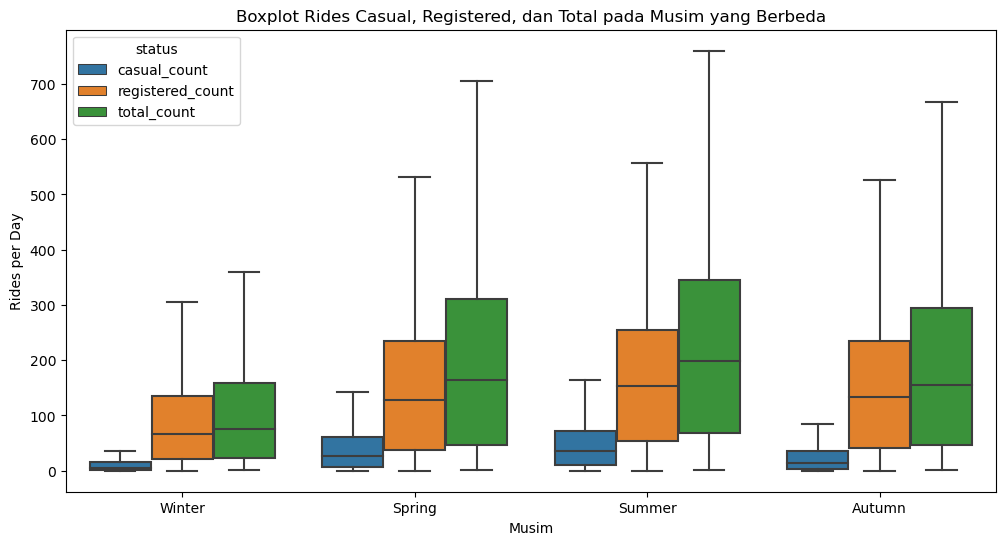

In [118]:
# memilih variables of interest
variables_of_interest = ['season', 'temperature', 'humidity', 'windspeed', 'casual_count', 'registered_count', 'total_count']
variable_df = bike_hour_df[variables_of_interest]

# Boxplot casual, registered, dan total count di setiap musim yang berbeda
df_ride = variable_df[['season', 'casual_count', 'registered_count', 'total_count']]
df_ride_melted = pd.melt(df_ride, id_vars='season', var_name='status', value_name='ride_per_day')

# Plot boxplot
plt.figure(figsize=(12, 6))
sn.boxplot(data=df_ride_melted, x='season', y='ride_per_day', hue='status', showfliers=False)
plt.xlabel('Musim')
plt.ylabel('Rides per Day')
plt.title('Boxplot Rides Casual, Registered, dan Total pada Musim yang Berbeda')
plt.show()


### Berdasarkan boxplot diatas dapat disimpulkan bahwa:
##### 1. untuk status casual_count
-musim panas (summer) memiliki median casual_count ride yang paling tinggi dibandingkan dengan musim lainnya.
##### 2. untuk status registered_count
-musim panas (summer) memiliki median registered_count ride yang paling tinggi, kemudian diikuti oleh musim semi (spring), gugur (autumn), dan dingin (winter)
##### 3. untuk status total_count
-musim panas (summer) juga memiliki median total_count ride yang paling tinggi, kemudian diikuti oleh musim semi (spring), gugur (autumn), dan dingin (winter)


<Axes: >

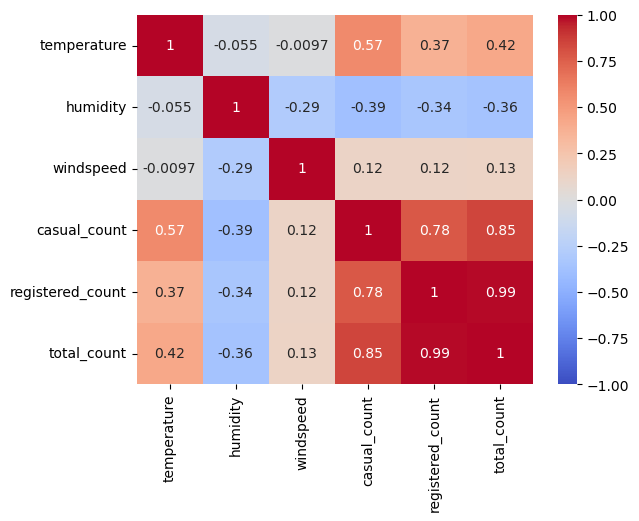

In [162]:
# Heatmap korelasi antara musim dan variable numerik
variables_of_interest = ['season', 'temperature', 'humidity', 'windspeed', 'casual_count', 'registered_count', 'total_count']
variable_df = bike_hour_df[variables_of_interest]

corr_matrix = variable_df.corr(numeric_only=True, method='spearman')
sn.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah kondisi cuaca (weather situation) mempengaruhi tingkat kenaikan ataupun penurunan jumlah rata-rata sewa sepeda? dan bagaimana impactnya ditahun 2011 dan 2012, apakah ada perbedaan?

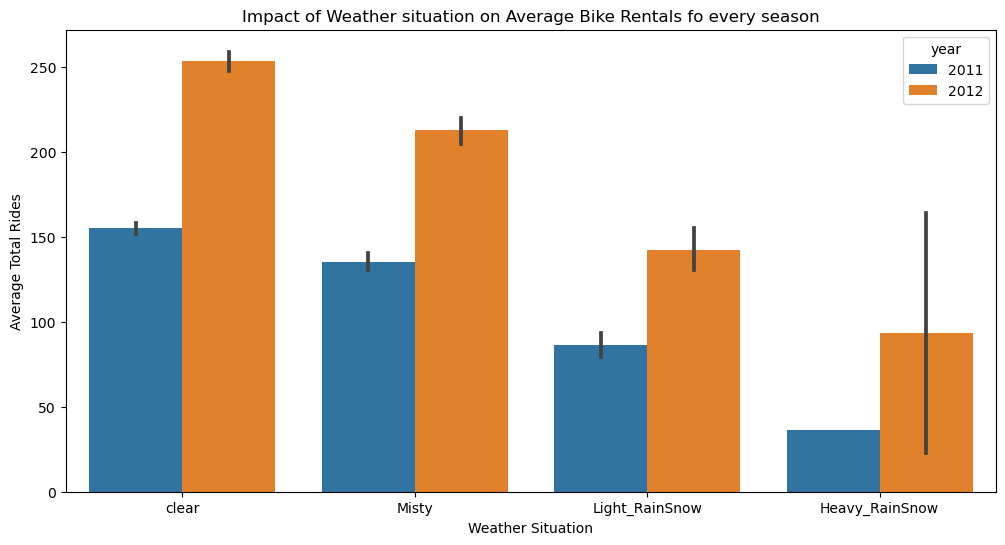

In [141]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot using the sn.barplot() function
sn.barplot(
    x="weathersit",  # Kolom kondisi cuaca sebagai x
    y="total_count",  # Kolom jumlah total sewa sepeda sebagai y
    data=bike_hour_df,
    hue="year"
)

# Add labels and a title to the plot
plt.xlabel("Weather Situation")
plt.ylabel("Average Total Rides")
plt.title("Impact of Weather situation on Average Bike Rentals fo every season")

# Show the plot
plt.show()

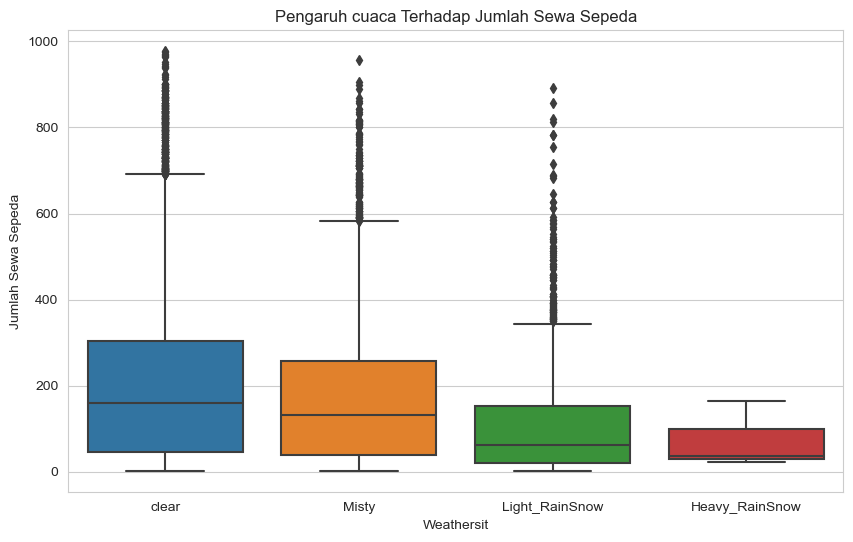

In [202]:
# Pengaruh Weathersit (kondisi cuaca) terhadap jumlah sewa sepeda
plt.figure(figsize=(10, 6))
sn.boxplot(x="weathersit", y="total_count", data=bike_hour_df)
plt.title("Pengaruh cuaca Terhadap Jumlah Sewa Sepeda")
plt.xlabel("Weathersit")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()

 ### Pertanyaan 2: Bagaimana tren penggunaan sepeda berubah setiap bulan dalam satu tahun tertentu?

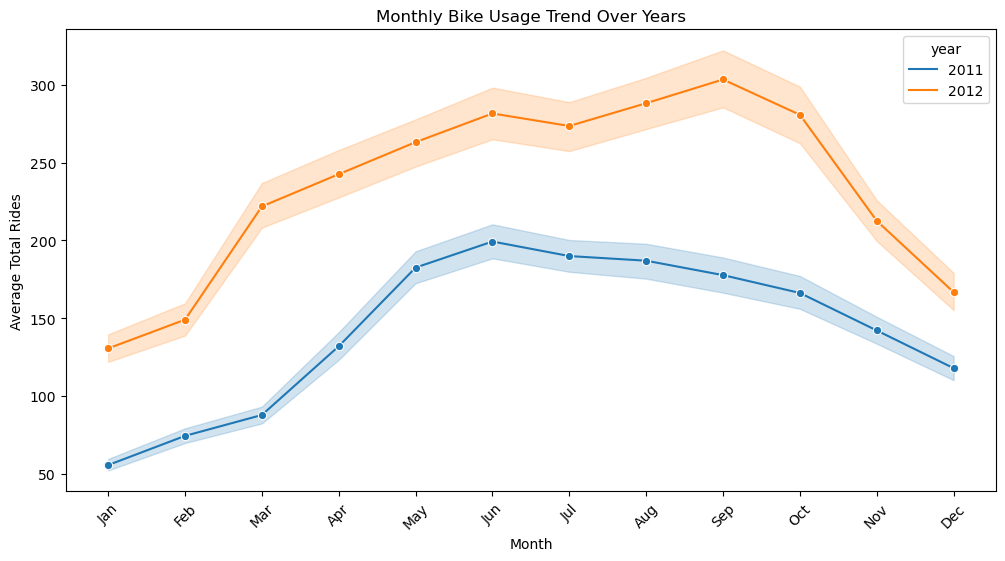

In [150]:
# Setting figsize
plt.figure(figsize=(12, 6))

# membuat linechart dengan fungsi sn.lineplot
sn.lineplot(
    x="month",    # Kolom bulan
    y="total_count",    # Kolom jumlah total pesanan sepeda
    data=bike_hour_df,
    hue="year",   # Pisahkan garis berdasarkan tahun
    marker='o',   # Menambahkan marker di setiap titik
)

# menambahkan label
plt.xlabel("Month")
plt.ylabel("Average Total Rides")
plt.title("Monthly Bike Usage Trend Over Years")

# menampilkan plot
plt.xticks(rotation=45)  
plt.show()

 ### Pertanyaan 3: Pada musim (seasons) apa tingkat sewa sepeda (bike-riding) mendapat order terbanyak dalam tiap tahun (tahun 2011 dan 2012)?

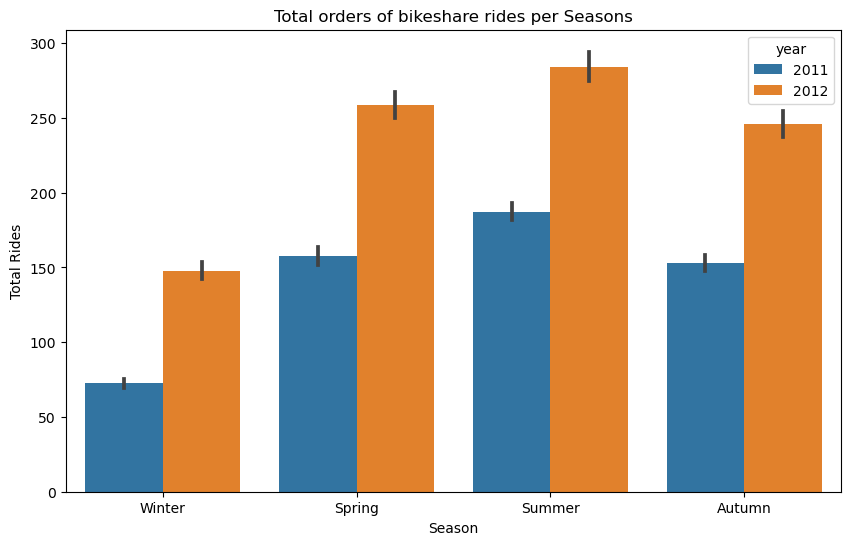

In [151]:
plt.figure(figsize=(10,6))

sn.barplot(x='season', y='total_count', data=bike_hour_df, hue='year')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total orders of bikeshare rides per Seasons")

plt.show()

### Pertanyaan 4:  Clustering Analisis untuk melihat korelasi antara temperature dengan jumlah bike rental dengan menggunakan K-means

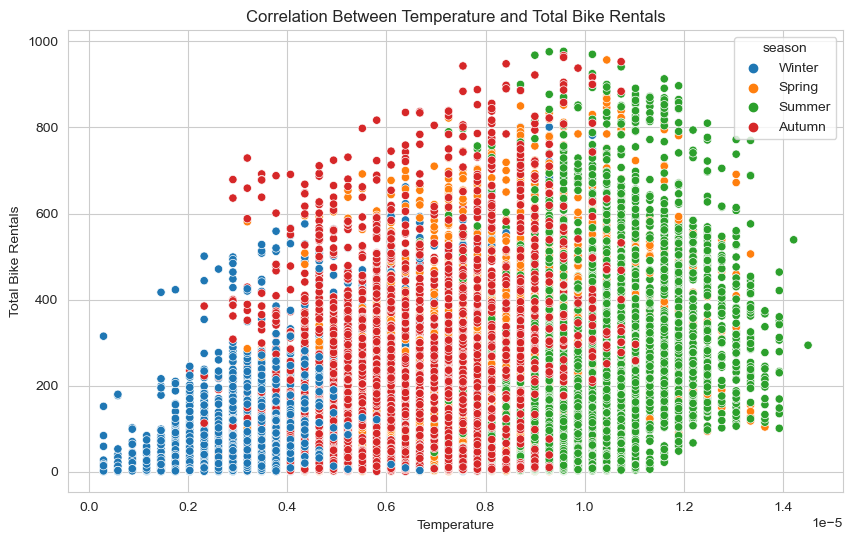

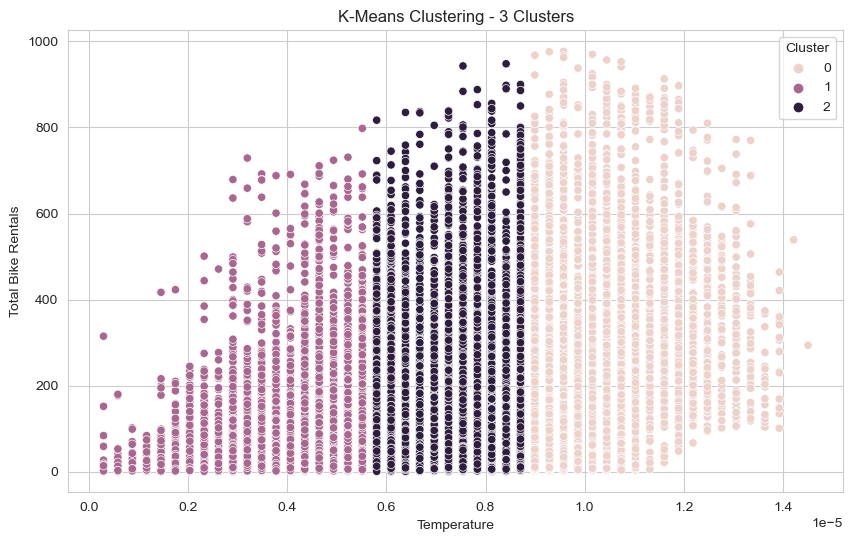

Cluster Centers:
[[1.03567281e-05]
 [4.01834302e-06]
 [7.24642945e-06]]


In [213]:
# Scatter plot untuk melihat hubungan antara temperature dan total bike rental
plt.figure(figsize=(10, 6))
sn.scatterplot(x='temperature', y='total_count', hue='season', data=bike_hour_df)
plt.xlabel('Temperature')
plt.ylabel('Total Bike Rentals')
plt.title('Correlation Between Temperature and Total Bike Rentals')
plt.show()

# Feature selection
features = ['temperature']

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bike_hour_df[features])

# KMeans clustering
num_clusters = 3
n_init_value = 10  
kmeans = KMeans(n_clusters=num_clusters, n_init=n_init_value, random_state=42)
bike_hour_df['cluster'] = kmeans.fit_predict(scaled_data)


# Scatter plot dengan warna berdasarkan cluster
plt.figure(figsize=(10, 6))
sn.scatterplot(x='temperature', y='total_count', hue='cluster', data=bike_hour_df)
plt.xlabel('Temperature')
plt.ylabel('Total Bike Rentals')
plt.title(f'K-Means Clustering - {num_clusters} Clusters')
plt.legend(title='Cluster')
plt.show()

# Menampilkan karakteristik setiap cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(cluster_centers)

## Conclusion

 ### Conclution pertanyaan 1 
      Dari hasil visualisasi untuk pertanyaan 1 diatas aalah benar bahwa kondisi cuaca (weather situation) mempengaruhi tingkat kenaikan ataupun penurunan jumlah rata-rata sewa sepeda. Kemudian ada sedikit perbedaan impact di thaun 2011 dan 2012. Dari visualisasi diketahui bahwa pada cuaca cerah(clear) rata-rata sewa sepeda tinggi ditahun 2012 dan 2011, sedangkan di cuaca misty dan lightrain/snow rata-rata sewa sepeda turun, dan di cuaca heavy rain rata-rata sewa sepada sangatlah rendah di tahun 2011 dan 2012.
  
  ### Conclution pertanyaan 2
      Trend penggunaan sepede relatif sama ditahun 2011 dan 2012, namun ditahun 2012 trend penggunaan sepeda lebih tinggi.
  
  ### conclution pertanyaan 3
      Musim panas (summer) merupakan musim dengan order sewa sepeda terbanyak di tahun 2011 dan 2012. Cuaca yang cerah, hangat, dan indah menjadi faktor utama yang mendorong tingginya order pada musim ini.

  ### Conclusion pertanyaan 4
      order bike-sharing memiliki nilai maksimum di summer dan nilai minimum di winter. Visualisasi yang ditampilkan sejalan dengan visualisasi yang ada di pertanyaan nomor 3. Dari hasil korelasi pertanyaan nomor 4 disimpulkan bahwa seiring dengan meningkatnya temperature orderan bike-sharing juga akan meningkat, puncaknya ada di musim summer. Dengan kata lain dapat dikatakan bahwa suhu yang lebih tinggi umumnya terkait dengan jumlah persewaan sepeda yang lebih tinggi. Peningkatan suhu dapat mendorong lebih banyak orang untuk menyewa sepeda.
  

In [128]:
#ekspor dataset yang telah di process ke bentuk csv didalam folder dashboard untuk memudahkan proses pembuatan dashboard 
bike_hour_df.to_csv('dashboard/bike_hour_df.csv', index=False)